## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 1.เขียนโปรแกรมสำหรับสร้างตัวจำแนกแบบเบส์สำหรับการแจกแจงปรกติตัวแปรเดียว กรณีที่ความแปรปรวนของทั้งสองคลาสเท่ากัน
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจก 
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

In [173]:

import numpy as np
import matplotlib.pyplot as plt


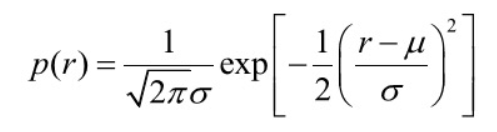

In [174]:

# Gaussian Probability Density Function for a normal distribution
def gaussian_pdf(x, mean, std_dev):
    return ((1 / np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev)**2)


In [175]:
# Posterior probability calculations
def posterior(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2):
    like_c1 = gaussian_pdf(x, mean1, std_dev1) * prior1
    like_c2 = gaussian_pdf(x, mean2, std_dev2) * prior2
    total = like_c1 + like_c2
    return like_c1 / total, like_c2 / total


In [176]:

# Function to plot distributions with optional random sampling
def plot_distribution(mean1, mean2, std_dev, prior1, prior2, seed=None, sampled=False):
    # Set the random seed if provided
    if seed is not None:
        np.random.seed(seed)

    x = np.linspace(-4, 4, 400)
    if sampled:
        # Generate random samples with the given seed
        mean1_sample = np.random.normal(mean1, std_dev, 25)
        mean2_sample = np.random.normal(mean2, std_dev, 25)
        std_dev1 = np.std(mean1_sample)
        std_dev2 = np.std(mean2_sample)
        mean1 = np.mean(mean1_sample)
        mean2 = np.mean(mean2_sample)
        title_suffix = f"Sampled (Seed={seed})"
    else:
        std_dev1 = std_dev2 = std_dev
        title_suffix = "Set"

    # Plot Likelihoods
    plt.figure(figsize=(25, 8))
    plt.subplot(1, 2, 1)
    plt.plot(x, gaussian_pdf(x, mean1, std_dev1), label=f'Class c1 ({title_suffix})', color='blue')
    plt.plot(x, gaussian_pdf(x, mean2, std_dev2), label=f'Class c2 ({title_suffix})', color='red', linestyle='dashed')
    plt.axvline(x=(mean1 + mean2) / 2, color='green', linestyle=':', label='Decision Boundary')
    plt.xlabel('x')
    plt.ylabel('Likelihood')
    plt.title(f'Likelihoods - {title_suffix} Parameters')
    plt.ylim(0, 1.2)
    plt.legend()
    
    # Plot Posterior Probabilities
    post_c1, post_c2 = posterior(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2)
    plt.subplot(1, 2, 2)
    plt.plot(x, post_c1, label=f'Class c1 ({title_suffix})', color='blue')
    plt.plot(x, post_c2, label=f'Class c2 ({title_suffix})', color='red', linestyle='dashed')
    plt.axvline(x=(mean1 + mean2) / 2, color='green', linestyle=':', label='Decision Boundary')
    plt.xlabel('x')
    plt.ylabel('Posterior Probability')
    plt.title(f'Posterior Probabilities - {title_suffix} Parameters')
    plt.ylim(0, 1.2)
    plt.legend()
    
    plt.show()

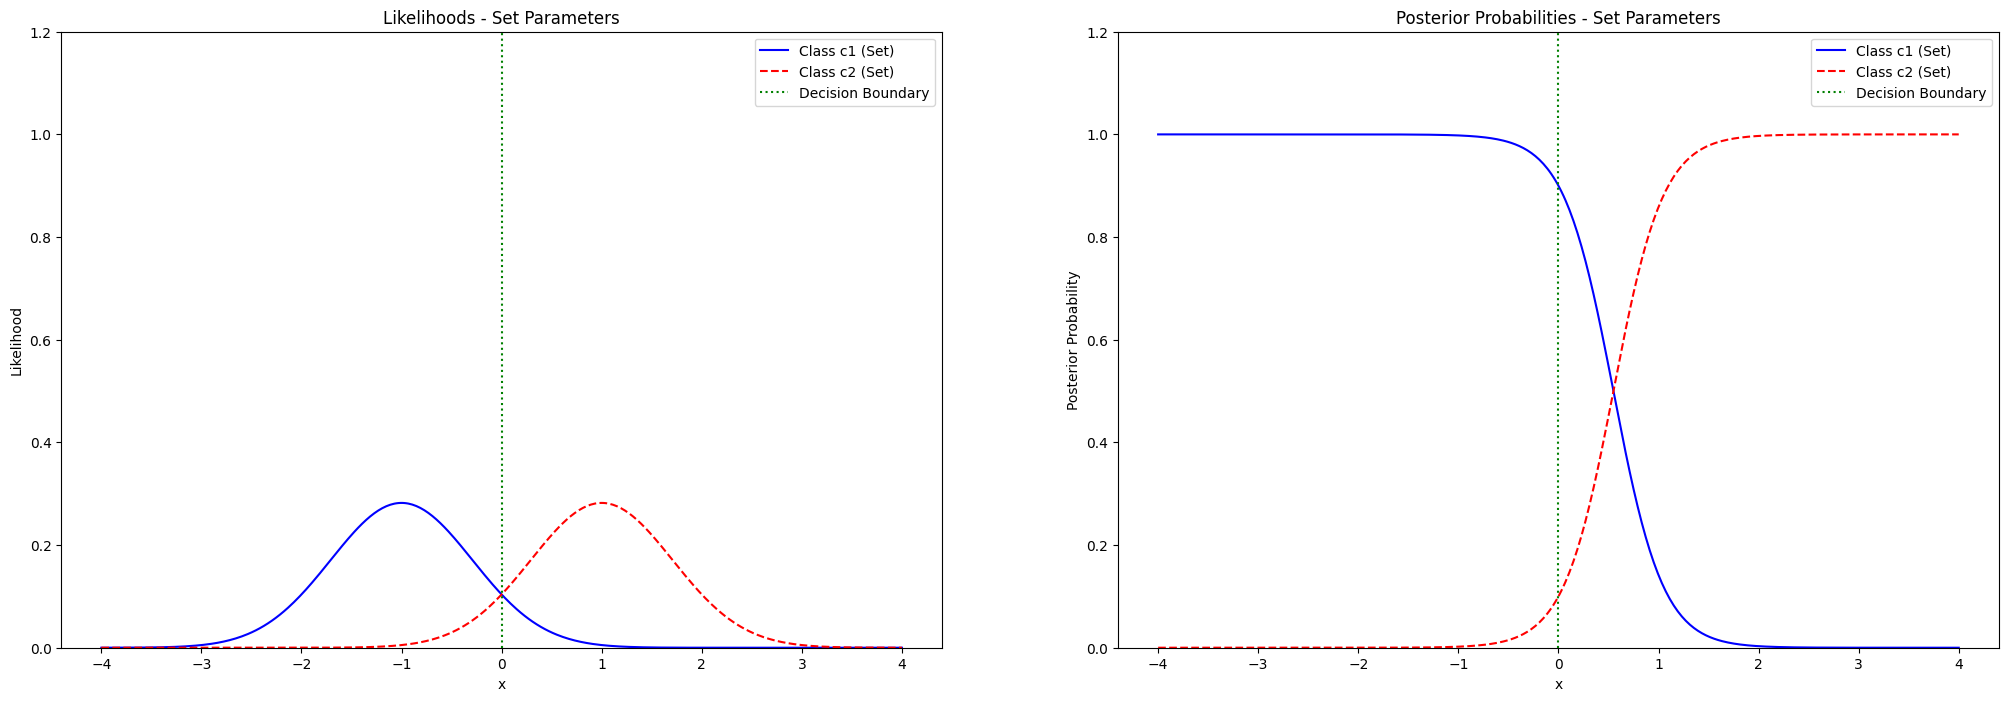

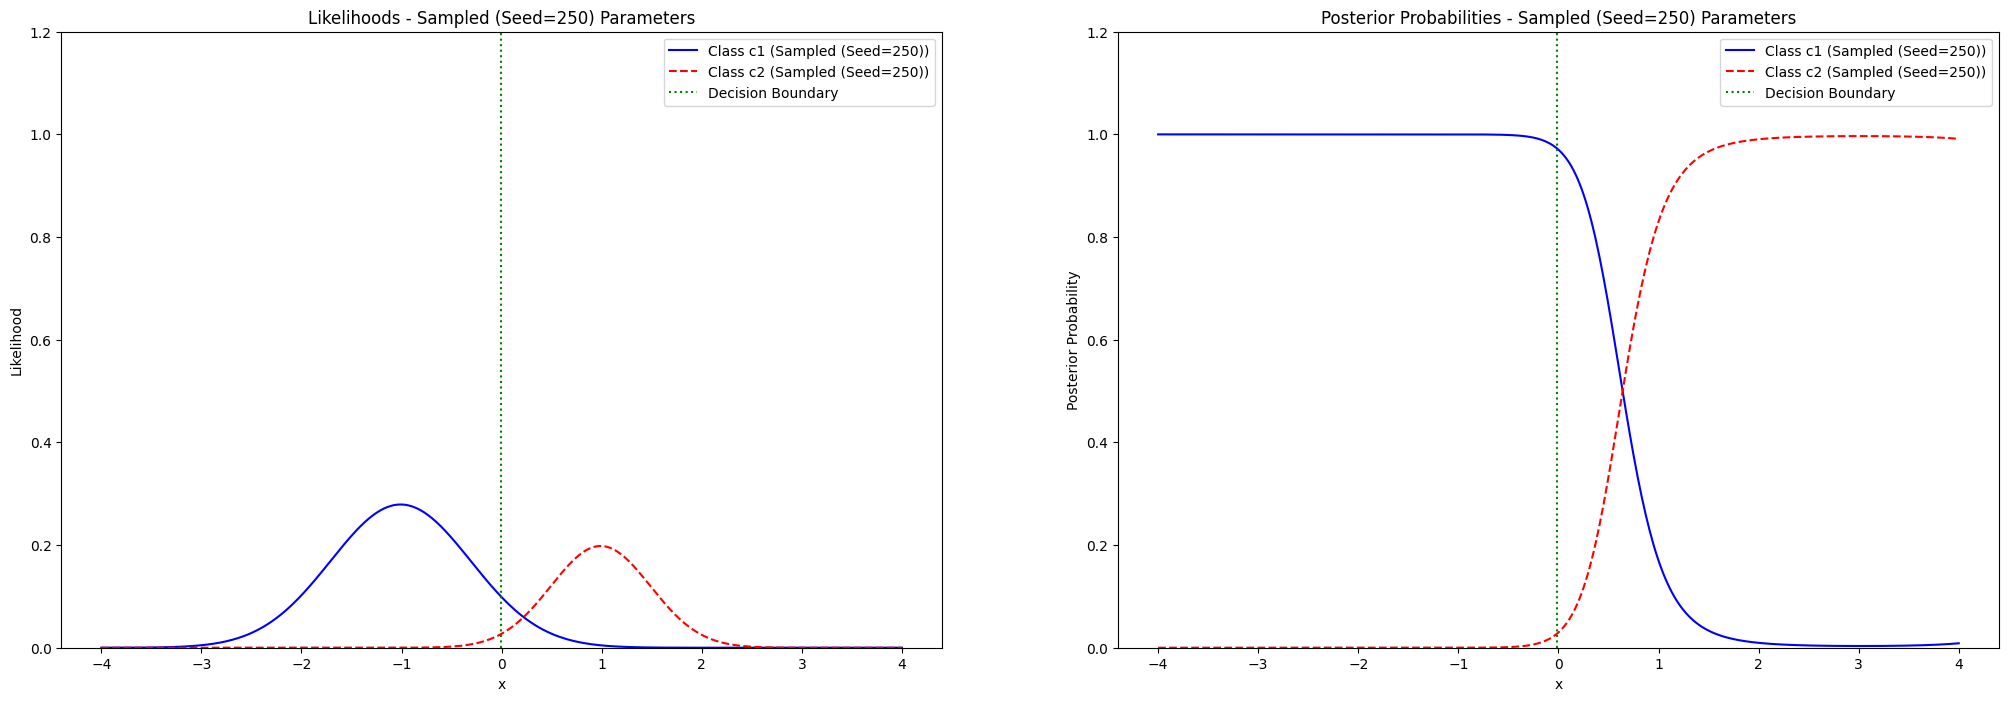

In [177]:
# Parameters
mean1, mean2 = -1, 1
std_dev = np.sqrt(0.50)  # Standard deviation derived from variance
prior1 = 0.9
prior2 = 0.1

# Set the seed for randomness
random_seed = 250

# Plot Set and Sampled Distributions
plot_distribution(mean1, mean2, std_dev, prior1, prior2, seed=random_seed, sampled=False)
plot_distribution(mean1, mean2, std_dev, prior1, prior2, seed=random_seed, sampled=True)

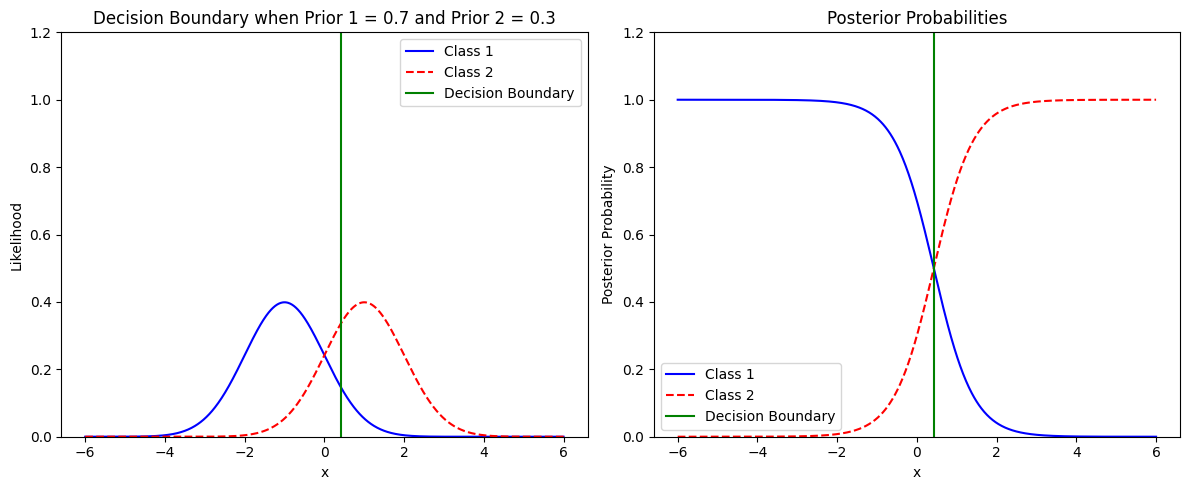

In [178]:
# Correctly coded
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Probability Density Function for a normal distribution
def gaussian_pdf(x, mean, std_dev):
    return ((1 / (np.sqrt(2 * np.pi) * std_dev))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

# Posterior probability calculations
def posterior(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2):
    like_c1 = gaussian_pdf(x, mean1, std_dev1) * prior1
    like_c2 = gaussian_pdf(x, mean2, std_dev2) * prior2
    total = like_c1 + like_c2
    return like_c1 / total, like_c2 / total

# Set parameters
mean1 = -1
mean2 = 1
std_dev1 = 1
std_dev2 = 1
prior1 = 0.7
prior2 = 0.3


# Generate x values
x = np.linspace(-6, 6, 1000)

# Calculate likelihoods
likelihood1 = gaussian_pdf(x, mean1, std_dev1)
likelihood2 = gaussian_pdf(x, mean2, std_dev2)

# Calculate decision boundary
def decision_boundary(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2):
    return (np.log(prior2/prior1) + 0.5*np.log(std_dev1**2/std_dev2**2) + 
            0.5*(x-mean1)**2/std_dev1**2 - 0.5*(x-mean2)**2/std_dev2**2)

db = decision_boundary(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2)
db_x = x[np.argmin(np.abs(db))]

# Plot likelihoods
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, likelihood1, label='Class 1', color='blue')
plt.plot(x, likelihood2, label='Class 2', color='red', linestyle='dashed')
plt.axvline(db_x, color='g', linestyle='-', label='Decision Boundary')
plt.title(f'Decision Boundary when Prior 1 = {prior1} and Prior 2 = {prior2}')

plt.xlabel('x')
plt.ylabel('Likelihood')
plt.ylim(0, 1.2)
plt.legend()

# Calculate and plot posterior probabilities
post1, post2 = posterior(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2)

plt.subplot(1, 2, 2)
plt.plot(x, post1, label='Class 1', color='blue')
plt.plot(x, post2, label='Class 2', color='red', linestyle='dashed')
plt.axvline(db_x, color='g', linestyle='-', label='Decision Boundary')
plt.title('Posterior Probabilities')
plt.xlabel('x')
plt.ylabel('Posterior Probability')
plt.ylim(0, 1.2)
plt.legend()

plt.tight_layout()
plt.show()

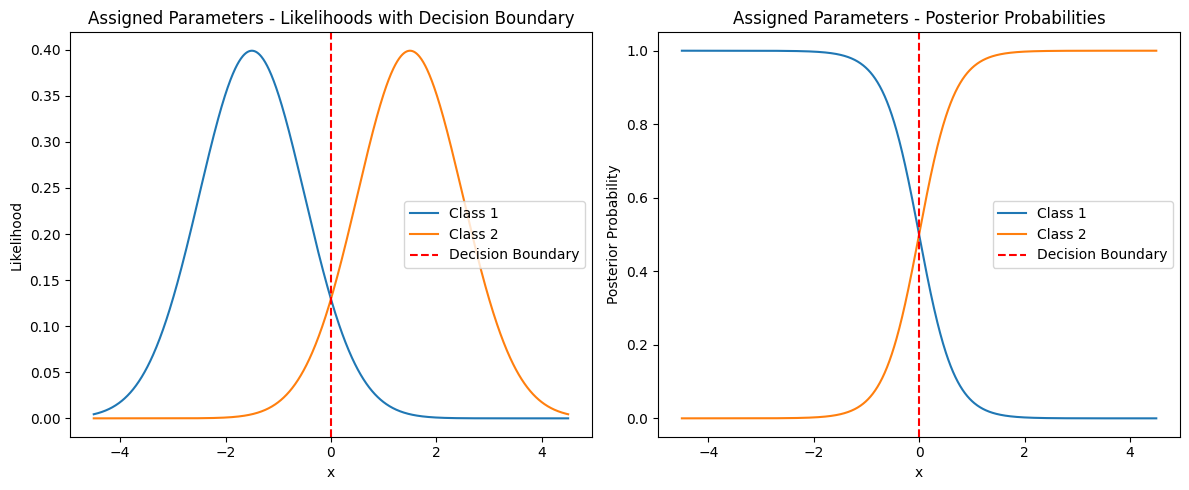

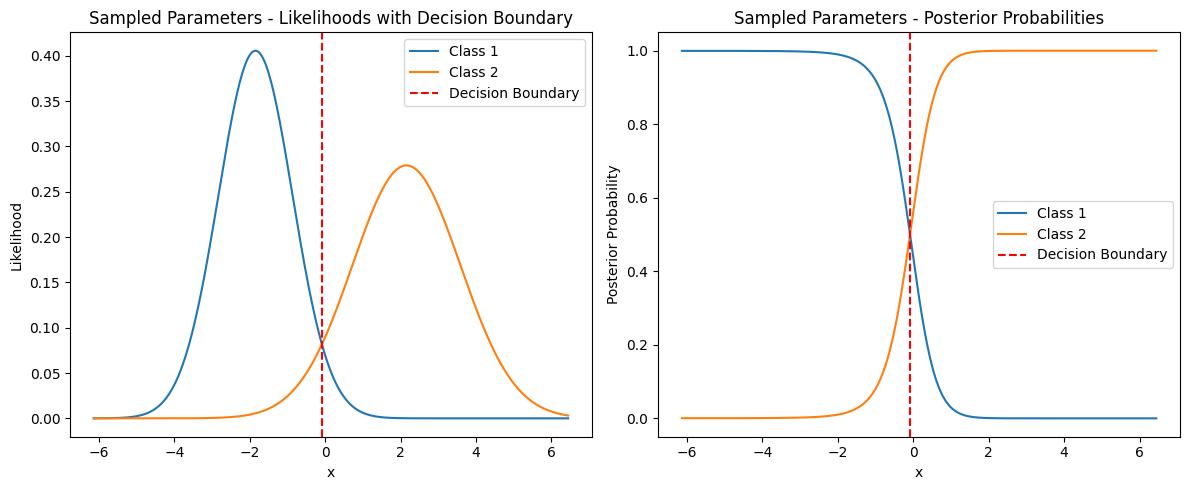

Assigned Parameters:
Class 1: mean = -1.50, std_dev = 1.00
Class 2: mean = 1.50, std_dev = 1.00
Priors: Class 1 = 0.50, Class 2 = 0.50

Sampled Parameters:
Class 1: mean = -1.85, std_dev = 0.98
Class 2: mean = 2.15, std_dev = 1.43
Priors: Class 1 = 0.50, Class 2 = 0.50


In [181]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_pdf(x, mean, std_dev):
    return ((1 / (np.sqrt(2 * np.pi) * std_dev))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

def posterior(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2):
    like_c1 = gaussian_pdf(x, mean1, std_dev1) * prior1
    like_c2 = gaussian_pdf(x, mean2, std_dev2) * prior2
    total = like_c1 + like_c2
    return like_c1 / total, like_c2 / total

def decision_boundary(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2):
    return (np.log(prior2/prior1) + 0.5*np.log(std_dev1**2/std_dev2**2) + 
            0.5*(x-mean1)**2/std_dev1**2 - 0.5*(x-mean2)**2/std_dev2**2)

def plot_distributions(mean1, std_dev1, mean2, std_dev2, prior1, prior2, title_prefix):
    x = np.linspace(min(mean1, mean2) - 3*max(std_dev1, std_dev2), 
                    max(mean1, mean2) + 3*max(std_dev1, std_dev2), 1000)
    
    likelihood1 = gaussian_pdf(x, mean1, std_dev1)
    likelihood2 = gaussian_pdf(x, mean2, std_dev2)
    
    db = decision_boundary(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2)
    db_x = x[np.argmin(np.abs(db))]
    
    post1, post2 = posterior(x, mean1, mean2, std_dev1, std_dev2, prior1, prior2)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, likelihood1, label='Class 1')
    plt.plot(x, likelihood2, label='Class 2')
    plt.axvline(db_x, color='r', linestyle='--', label='Decision Boundary')
    plt.title(f'{title_prefix} - Likelihoods with Decision Boundary')
    plt.xlabel('x')
    plt.ylabel('Likelihood')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, post1, label='Class 1')
    plt.plot(x, post2, label='Class 2')
    plt.axvline(db_x, color='r', linestyle='--', label='Decision Boundary')
    plt.title(f'{title_prefix} - Posterior Probabilities')
    plt.xlabel('x')
    plt.ylabel('Posterior Probability')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Scenario 1: Manually assign distribution parameters
mean1, std_dev1 = -1.5, 1
mean2, std_dev2 = 1.5, 1
prior1, prior2 = 0.5, 0.5

plot_distributions(mean1, std_dev1, mean2, std_dev2, prior1, prior2, "Assigned Parameters")

# Scenario 2: Random sampling to calculate distribution parameters
np.random.seed(252)  # for reproducibility
sample1 = np.random.normal(loc=-2, scale=1, size=100)
sample2 = np.random.normal(loc=2, scale=1.5, size=100)

mean1_sampled, std_dev1_sampled = np.mean(sample1), np.std(sample1)
mean2_sampled, std_dev2_sampled = np.mean(sample2), np.std(sample2)
prior1_sampled, prior2_sampled = len(sample1) / (len(sample1) + len(sample2)), len(sample2) / (len(sample1) + len(sample2))

plot_distributions(mean1_sampled, std_dev1_sampled, mean2_sampled, std_dev2_sampled, prior1_sampled, prior2_sampled, "Sampled Parameters")

print("Assigned Parameters:")
print(f"Class 1: mean = {mean1:.2f}, std_dev = {std_dev1:.2f}")
print(f"Class 2: mean = {mean2:.2f}, std_dev = {std_dev2:.2f}")
print(f"Priors: Class 1 = {prior1:.2f}, Class 2 = {prior2:.2f}")

print("\nSampled Parameters:")
print(f"Class 1: mean = {mean1_sampled:.2f}, std_dev = {std_dev1_sampled:.2f}")
print(f"Class 2: mean = {mean2_sampled:.2f}, std_dev = {std_dev2_sampled:.2f}")
print(f"Priors: Class 1 = {prior1_sampled:.2f}, Class 2 = {prior2_sampled:.2f}")